 <div style="width: 650px; border-radius: 10px; border: 2px solid #ff0000; padding: 10px; background-color: #e8a348; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #f20707; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Title:Dive Deeper✨: Exploring the Hidden Sentiments | Logistic Regression</h1>
    

### **Dataset Link**:[Data](https://www.kaggle.com/datasets/kazanova/sentiment140)

## **About Dataset<a id="Step-1"></a>:**
### **Context:**
This is the sentiment 140 dataset. It contains 1,600,000 tweets and Contains Six Columns 'target', 'ids', 'date', 'flag', 'user', 'text'.The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment.
## **About Columns:**
* `target:` the polarity of the tweet (0 = negative, 4 = positive)

* `ids:` The id of the tweet ( 2087)

* `date:` the date of the tweet (Sat May 16 23:58:44 UTC 2009)

* `flag:` The query (lyx) Column represents that If there is no query, then this value is NO_QUERY.

* `user:` The user that tweeted (robotickilldozr)

* `text:` The text of the tweet (Lyx is cool)
## **Acknowledgements:**
* The official link regarding the dataset with resources about how it was generated is here
The official paper detailing the approach is here

* `Citation:` Go, A., Bhayani, R. and Huang, L., 2009. Twitter sentiment classification using distant supervision. CS224N Project Report, Stanford, 1(2009), p.12.
## **Aims and Objectives<a id="Step-2"></a>:**
* The Main Aim to take this Dataset is to recognize that the Twiter tweets either the Positive Tweets or Negative Tweets

 <div style="width: 650px; border-radius: 10px; border: 2px solid #ff0000; padding: 10px; background-color: #e8a348; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #f20707; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Import Libararies✨</h1>
</div>  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

 <div style="width: 650px; border-radius: 10px; border: 2px solid #ff0000; padding: 10px; background-color: #e8a348; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #f20707; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Lets Load and display the dataset💡</h1>
</div>  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv(r'/content/drive/MyDrive/datasets/training.csv',encoding="latin_1",  names=['target', 'ids', 'date', 'flag', 'user', 'text'])
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## **Data Columns<a id="Step-4"></a>**

In [4]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

## **Observations:**
* There are 6 columns in the Sentiment140 dataset with 1.6 million tweets such as:
1. 'target'
2. ids'
3. 'date'
4. 'flag'
5. 'user'
6. 'text'


## **Data Shape<a id="Step-5"></a>**

In [5]:
df.shape

(1600000, 6)

## **Observations:**
>* There are 1600000 Tweets and 6 columns in this Dataset

## **Data Structure<a id="Step-6"></a>**

In [6]:
# Dta Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## **Summary Statistics<a id="Step-7"></a>**

In [7]:
# Summary Statistics
df.describe()

,target,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


 <div style="width: 650px; border-radius: 10px; border: 2px solid #ff0000; padding: 10px; background-color: #e8a348; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #f20707; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Lets Check the Duplicates present in Data🌂</h1>
</div>

In [8]:
# Lets check the Duplicates present in the Data
df.duplicated().sum()

0

## **Observation:**
* There is no Duplicate present in the Dataset

 <div style="width: 650px; border-radius: 10px; border: 2px solid #ff0000; padding: 10px; background-color: #e8a348; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #f20707; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Lets Explore the Columns of the Data🌏</h1>
</div>  

### **Lets Explore the flag Column<a id="Step-9.1"></a>**

In [9]:
# Lets Explore the id column
df_ids=df['ids'].min()
print("The Minimum ids are:",df_ids)
df_ids1=df['ids'].max()
print("The Maximum ids are:",df_ids1)
df_ids2=df['ids'].sum()
print("The sum of ids are:",df_ids2)

The Minimum ids are: 1467810369
The Maximum ids are: 2329205794
The sum of ids are: 3198108083673004


## **Observations:**
>* The Minimum ids which are present in this dataset are: 1467810369
>* The Maximum ids which are present in this dataset are: 2329205794
>* The sum of ids which are present in this dataset are: 3198108083673004

In [10]:
# Lets explore the flag column
df_flag=df['flag'].describe()
df_flag

count      1600000
unique           1
top       NO_QUERY
freq       1600000
Name: flag, dtype: object

## **Observations:**
>* The top flag of this Dataset is NO_QUERY
>* The flag count is 1600000

### **Lets Explore the User Column<a id="Step-9.2"></a>**

In [11]:
# Lets Explore the user column
df['user'].value_counts().head(10)

user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
Name: count, dtype: int64

### **Lets Explore the Target Column<a id="Step-9.3"></a>**

In [12]:
df_1=df['target'].value_counts()
df_target=pd.DataFrame(df_1)
df_target=df_target.reset_index()
df_target.columns = ['target', 'count']
df_target['target'] = df_target['target'].apply(lambda x: 1 if x == 4 else x)

# Now df_target DataFrame will have 1 for positive tweets and 0 for negative tweets
df_target.head()

,target,count
0,0,800000
1,1,800000


So the Data is Not Imbalance

## **Observation:**
>* In this Dataset 0 represents the negative tweet and  4 represents the positive tweet. So, I replace the value 4 with 1 so, that positive tweet easily recognized as 1 and Negative Tweet as 0.

In [13]:
# First, let's get the value counts of the 'target' column
df_1 = df['target'].value_counts()

# Create a DataFrame with the counts
df_target = pd.DataFrame(df_1)

# Reset the index to have the 'target' values as a column
df_target = df_target.reset_index()

# Rename the columns
df_target.columns = ['target', 'count']

# Filter the DataFrame to get counts of positive (1) and negative (0) tweets
positive_count = df_target[df_target['target'] == 1]['count'].values
negative_count = df_target[df_target['target'] == 0]['count'].values

# Determine which value represents positive tweets based on counts
if len(positive_count) > 0 and (len(negative_count) == 0 or positive_count[0] > negative_count[0]):
    positive_value = 0
    negative_value = 1
elif len(negative_count) > 0:
    positive_value = 1
    negative_value = 0
else:
    # Handle the case where both counts are empty
    positive_value = None
    negative_value = None

if positive_value is not None and negative_value is not None:
    print(f"Assuming {df_target['count'].sum()} tweets:")
    print(f"Value {positive_value} represents positive tweets.")
    print(f"Value {negative_value} represents negative tweets.")
else:
    print("Unable to determine which value represents positive or negative tweets.")

Assuming 1600000 tweets:
Value 1 represents positive tweets.
Value 0 represents negative tweets.


## **Observation:**
>* Value 1 represents positive tweets.
>* Value 0 represents negative tweets.

 <div style="width: 650px; border-radius: 10px; border: 2px solid #ff0000; padding: 10px; background-color: #e8a348; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #f20707; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Lets Have a Glimpse at the positive and Negative Sentiments<a id="Step-10"></a>✨🌟</h1>
</div>

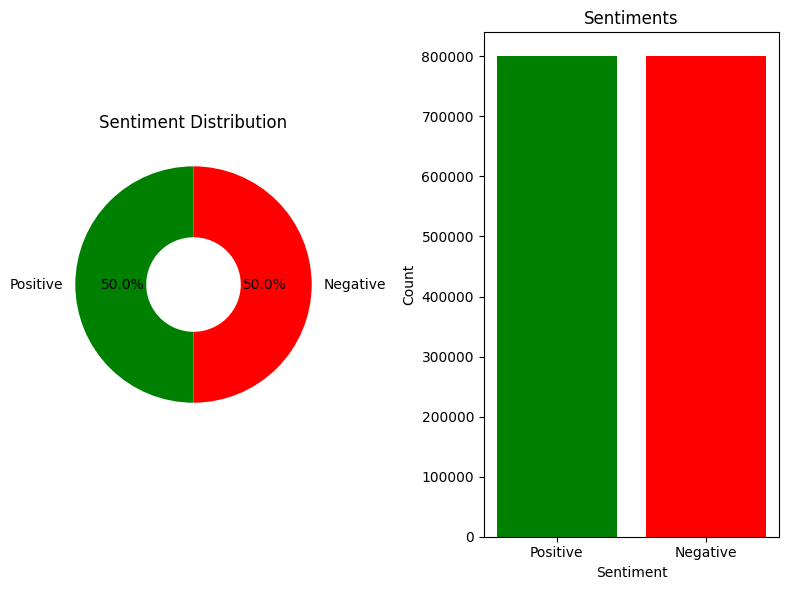

In [14]:
import matplotlib.pyplot as plt
df_target = (
    df['target'].value_counts().to_frame(name='count').reset_index()
    .rename(columns={'index': 'target'})
)

# Convert 'target' to numeric (1 for positive, 0 for negative)
df_target['target'] = df_target['target'].replace(4, 1)

# Calculate user counts for positive and negative tweets
positive_tweets = df_target[df_target['target'] == 1]['count'].sum()
negative_tweets = df_target[df_target['target'] == 0]['count'].sum()

#sunplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

# Pie Chart for Sentiment Distribution
ax1.pie(
    [positive_tweets, negative_tweets],
    labels=['Positive', 'Negative'],
    autopct="%1.1f%%",
    startangle=90,
    colors=['green', 'red'],
    wedgeprops=dict(width=0.6)
)
ax1.set_title('Sentiment Distribution')

# Bar Chart for User Counts
ax2.bar(['Positive', 'Negative'], [positive_tweets, negative_tweets], color=['green', 'red'])
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Count')
ax2.set_title('Sentiments')

# Tight layout for better overall plot arrangement
plt.tight_layout()

# Display the combined plot
plt.show()


 <div style="width: 650px; border-radius: 10px; border: 2px solid #ff0000; padding: 10px; background-color: #e8a348; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #f20707; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Data Cleaning✨🌟</h1>
</div>

## **Remove Html Tags and URLs<a id="Step-11"></a>**

>* In The case when we are working with textual Data then it is Essential to remove the `HTML tags` in order to take the textual Data without any formatting Hence it also essential for the `Consistency in the Data`
>* The Removing of URLs is also necessary in similar way for taking the `valuable information` and for the `Reduction of Noise in the Data`
>* `Simplified analysis:`The Removal of HTML tags and the URLs make the analysis simplified

In [15]:
import re

# Function to remove HTML tags
def remove_html_tags(text):
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text

# Function to remove URLs
def remove_urls(text):
    clean_text = re.sub(r'http\S+', '', text)
    return clean_text

## **Lower Casing and Remove ChatChatWords<a id="Step-12"></a>**

>* When working with Textual Data then it is necessary to convert the whole text to the lowercase Because by lowercasing the Consistency of the Data is maintained.Hence it Reduces the unique words in the vocabulary
>* The Removing of ChatWords improved the Understanding and hence it makes easier for the model to understand the content accuratly
>* It involves consistency in the language and also causes the reduction in noise

In [16]:
import string

# Function to convert text to lowercase
def convert_to_lowercase(text):
    return text.lower()

# Function to replace chat words
def replace_chat_words(text):
    chat_words = {
        "BRB": "Be right back",
        "BTW": "By the way",
        "OMG": "Oh my God/goodness",
        "TTYL": "Talk to you later",
        "OMW": "On my way",
        "SMH/SMDH": "Shaking my head/shaking my darn head",
        "LOL": "Laugh out loud",
        "TBD": "To be determined",
        "IMHO/IMO": "In my humble opinion",
        "HMU": "Hit me up",
        "IIRC": "If I remember correctly",
        "LMK": "Let me know",
        "OG": "Original gangsters (used for old friends)",
        "FTW": "For the win",
        "NVM": "Nevermind",
        "OOTD": "Outfit of the day",
        "Ngl": "Not gonna lie",
        "Rq": "real quick",
        "Iykyk": "If you know, you know",
        "Ong": "On god (I swear)",
        "YAAAS": "Yes!",
        "Brt": "Be right there",
        "Sm": "So much",
        "Ig": "I guess",
        "Wya": "Where you at",
        "Istg": "I swear to god",
        "Hbu": "How about you",
        "Atm": "At the moment",
        "Asap": "As soon as possible",
        "Fyi": "For your information"
    }
    for word, expanded_form in chat_words.items():
        text = text.replace(word, expanded_form)
    return text


## **Remove Punctuation and StopWords<a id="Step-13"></a>**

>* All The punction marks are being generally shown by the command string.punctuation
>* It Involves the Improved Tokenization. Removing the punctuation marks helps in correctly identifying and separating the words present in the Data
>* It reduces the Noise of the Data
>* The Removing of stopwords helps to tooks only the important content of the Data
>* The removing of stopwords helps for the clear Analysis

In [17]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
from nltk.corpus import stopwords

# Function to remove punctuation
def remove_punctuation(text):
    clean_text = ''.join(ch for ch in text if ch not in string.punctuation)
    return clean_text

# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

## **Remove Witespace and Special Chararcters<a id="Step-14"></a>**

>* The whitespace generally refers to the newlines or spaces.It helps for the Reduction of Noise
>* By Removing the whitespaces and special characters the proper tokenization can be takes place
>* Removing the whitespaces from the text hepls to maintains the consistency


In [19]:
# Function to remove whitespace
def remove_whitespace(text):
    return text.strip()

# Function to remove special characters
def remove_special_characters(text):
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return clean_text

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
# Combine all data cleaning functions into one preprocessing function
def preprocess_text(text):
    text = remove_html_tags(text)
    text = remove_urls(text)
    text = convert_to_lowercase(text)
    text = replace_chat_words(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = remove_whitespace(text)
    text = remove_special_characters(text)
    return text

# Apply preprocessing function to DataFrame
df['text'] = df['text'].apply(preprocess_text)

<div style="width: 650px; border-radius: 10px; border: 2px solid #ff0000; padding: 10px; background-color: #e8a348; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #f20707; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">⛅Lets Generate the WordCloud⛅</h1>
</div>



>* The WordCloud is used for the Visualization of the textual Data
>* It represents the most frequent words of the textual Data
>* By making the Word Cloud we can clearly visualize the frequent words of the textual  Data
>* By making word Cloud we can condense the large volume of the textual Data into a compact visualization

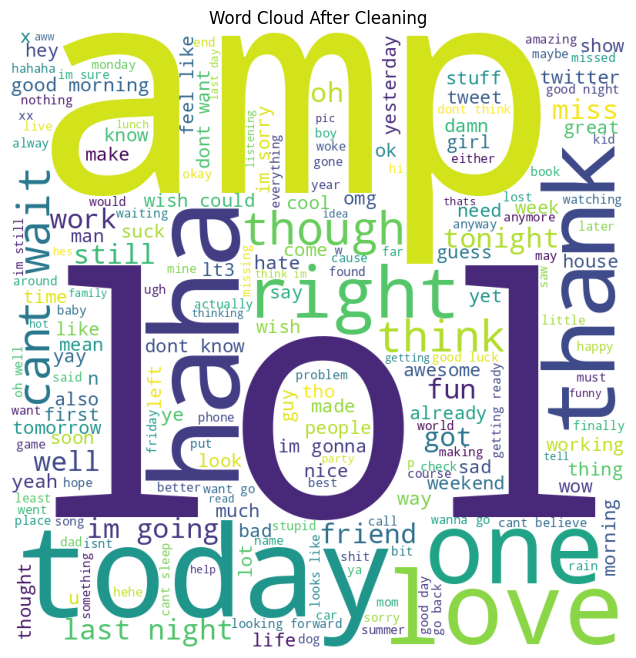

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from nltk.corpus import stopwords

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=stop_words,
                          min_font_size=10).generate(text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

# Apply preprocessing function to DataFrame
df['text'] = df['text'].apply(preprocess_text)

# Generate word cloud from cleaned text
generate_word_cloud(' '.join(df['text']), 'Word Cloud After Cleaning')


 <div style="width: 650px; border-radius: 10px; border: 2px solid #ff0000; padding: 10px; background-color: #e8a348; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #f20707; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Lets Generate the Word frequency Plot💹</h1>
</div>


>* The Word Frequency plot Represents the Frequency of the words
>* It helps to Analyze the Distribution of the Data
>* It Depict that how frequently particular word found in the Textual Data


<ipython-input-23-db6a5e912161>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


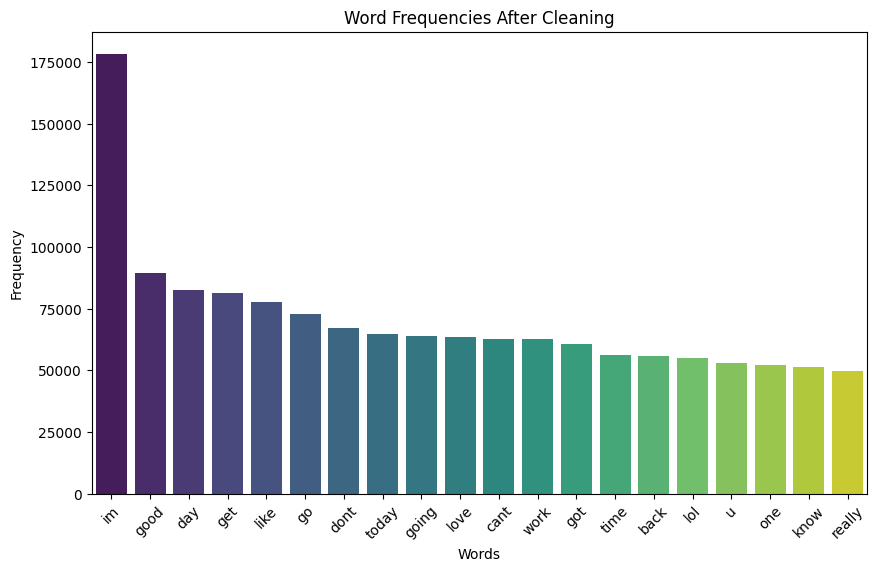

In [23]:
# Function to plot bar plot of word frequencies
def plot_word_frequencies(text, title):
    word_freq = nltk.FreqDist(text.split())
    common_words = word_freq.most_common(20)
    words, freqs = zip(*common_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words), y=list(freqs), palette='viridis')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
plot_word_frequencies(' '.join(df['text']), 'Word Frequencies After Cleaning')
# plot_word_frequencies(' '.join(df['user']), 'User Word Frequencies After Cleaning')
# plot_word_frequencies(' '.join(df['flag']), 'Flag Word Frequencies After Cleaning')

## **WordCloud of User and Flag Column<a id="Step-17"></a>**

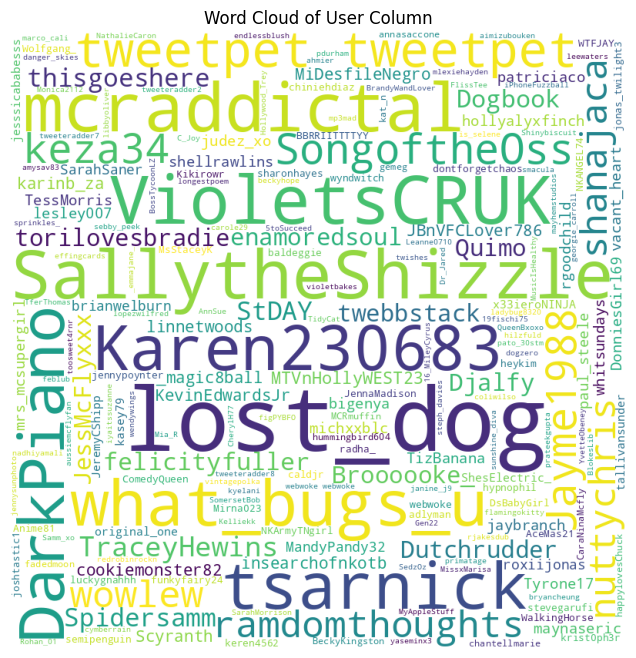

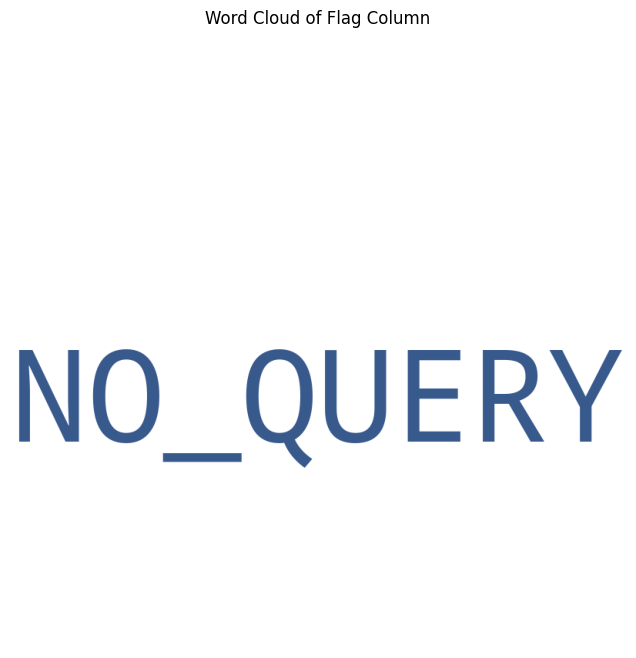

In [24]:
generate_word_cloud(' '.join(df['user']), 'Word Cloud of User Column')
generate_word_cloud(' '.join(df['flag']), 'Word Cloud of Flag Column')

## **Lets Generate the Word Frequency of User and Flag Column<a id="Step-18"></a>**

<ipython-input-23-db6a5e912161>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


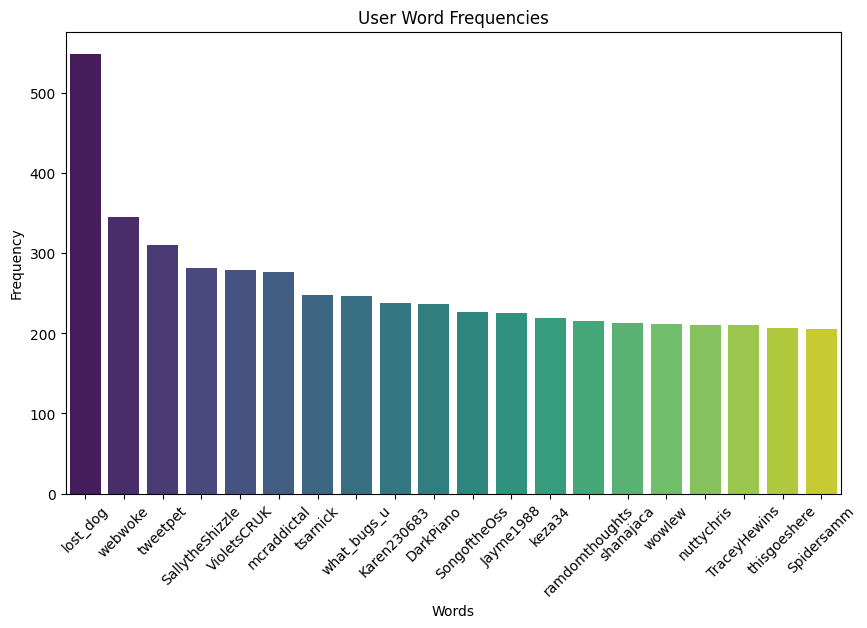

<ipython-input-23-db6a5e912161>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


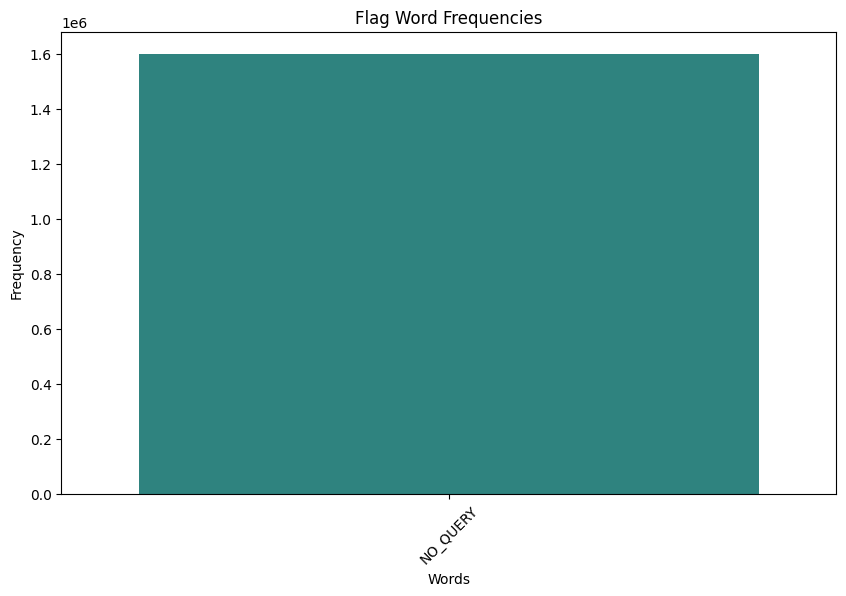

In [25]:
plot_word_frequencies(' '.join(df['user']), 'User Word Frequencies')
plot_word_frequencies(' '.join(df['flag']), 'Flag Word Frequencies')

In [26]:
# Lets Check Unique values after Data Cleaning
df['text'].unique()

array(['switchfoot awww thats bummer shoulda got david carr third day',
       'upset cant update facebook texting might cry result school today also blah',
       'kenichan dived many times ball managed save 50 rest go bounds',
       ..., 'ready mojo makeover ask details',
       'happy 38th birthday boo alll time tupac amaru shakur',
       'happy charitytuesday thenspcc sparkscharity speakinguph4h'],
      dtype=object)

In [27]:
df['text'].head()

0    switchfoot awww thats bummer shoulda got david...
1    upset cant update facebook texting might cry r...
2    kenichan dived many times ball managed save 50...
3                     whole body feels itchy like fire
4             nationwideclass behaving im mad cant see
Name: text, dtype: object

<div style="width: 650px; border-radius: 10px; border: 2px solid #ff0000; padding: 10px; background-color: #e8a348; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #f20707; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Lets have a CloseLook at the missing values⚠️</h1>
</div>



In [28]:
df.isnull().sum().sort_values(ascending=False)

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

## **Observation:**
>* There is no Missing Values present in the Data

<div style="width: 650px; border-radius: 10px; border: 2px solid #ff0000; padding: 10px; background-color: #e8a348; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #f20707; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">☀️Let's Train the Logistic Regression Model⚡</h1>
</div>


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert tokenized text to BoW features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])

# Assuming df is your DataFrame with the target column modified
df['target'][df['target']==4]=1 #changig value from 4 to 1
y = df['target']

<ipython-input-29-cc51fcb0f621>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'][df['target']==4]=1 #changig value from 4 to 1


In [30]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:

# Predict on the testing set
y_pred = logreg.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.783875


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from joblib import dump
import joblib
vectorizer.vocabulary
joblib.dump(vectorizer,'vectorizer.pkl')

['vectorizer1.pkl']

In [33]:

dump(logreg, "clf.pkl")

['clf.pkl']

<!-- Conclusion -->
<p style="text-shadow: 1px 1px 2px black; color: RED; font-family: Arial; font-size: 200%; font-weight: bold;">
    <em>Thank you for taking the time to explore my notebook. Your input is valuable and greatly appreciated</em>
</p>
